In [23]:
#Import packages
from cobra.io import load_model
from hyperopt import hp, fmin, tpe
import pandas as pd

Things to fix:
- How to deal with infeasible areas? Penalize

In [29]:
sample_data = pd.DataFrame()
losses = []
params = []
def mc_objective(conditions):
    #Import E.coli core model
    model = load_model("textbook")

    #Insert heterologous pathway for testing - NOT IMPLEMENTED

    #Define growth conditions changes
    cond_names = ['EX_co2_e', 'EX_h_e', 'EX_h2o_e', 'EX_nh4_e', 'EX_o2_e', 'EX_pi_e']
    medium = model.medium
    for c in conditions:
        medium[c] = conditions[c]
    model.medium = medium

    #Run FBA optimization
    solution = model.optimize()
    #Compute objective function - heterologous pathway flux? growth rate?
    losses.append(solution.objective_value)
    params.append(conditions)
    return 1 - solution.objective_value


In [30]:
#Define growth conditions search space
space = {"EX_glc__D_e": hp.uniform('EX_glc__D_e', 0, 10), "EX_co2_e": hp.uniform('EX_co2_e', 0, 1000), 
         "EX_h_e": hp.uniform('EX_h_e', 0, 1000), "EX_h2o_e": hp.uniform('EX_h2o_e', 0, 1000), 
         "EX_nh4_e": hp.uniform('EX_nh4_e', 0, 1000), "EX_o2_e": hp.uniform('EX_o2_e', 0, 1000), 
         "EX_pi_e": hp.uniform('EX_pi_e', 0, 1000)}
best = fmin(mc_objective, space, algo=tpe.suggest, max_evals=100)

  1%|          | 1/100 [00:00<00:40,  2.45trial/s, best loss: 1.0]

/Users/charlotte/opt/anaconda3/envs/cobra/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



 38%|███▊      | 38/100 [00:11<00:21,  2.82trial/s, best loss: 0.12654131088152443]

/Users/charlotte/opt/anaconda3/envs/cobra/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



 65%|██████▌   | 65/100 [00:22<00:19,  1.81trial/s, best loss: 0.12654131088152443]

/Users/charlotte/opt/anaconda3/envs/cobra/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)



100%|██████████| 100/100 [00:37<00:00,  2.68trial/s, best loss: 0.12652030189501984]


In [31]:
best

{'EX_co2_e': 762.4300146181014,
 'EX_glc__D_e': 9.995180165975258,
 'EX_h2o_e': 626.1147376477796,
 'EX_h_e': 466.4381791209571,
 'EX_nh4_e': 273.16695859835625,
 'EX_o2_e': 146.799510828738,
 'EX_pi_e': 153.27248415177016}

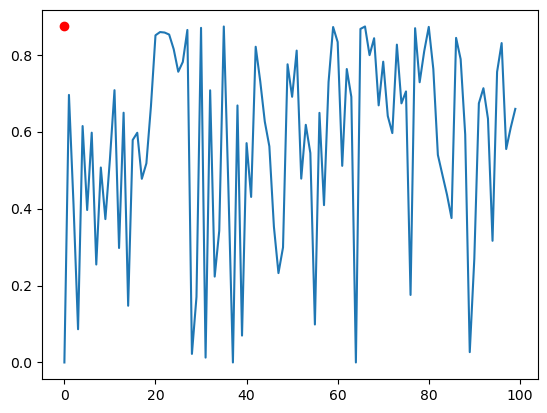

In [36]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(losses)
plt.plot(np.max(losses), 'ro')